## Assignment: $k$ Means Clustering

## **Do two questions.**

In [2]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 7.61 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [4]:
#load the Airbnb data
path = '/content/kmc/data/airbnb_hw.csv'
df = pd.read_csv(path)
df = df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]

#clean Price
df['Price'] = df['Price'].replace(',','').replace('$','')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

#clean Beds
df['Beds'] = df['Beds'].replace(',','')
df['Beds'] = pd.to_numeric(df['Beds'], errors = 'coerce')

#clean Number Of Reviews
df['Number Of Reviews'] = df['Number Of Reviews'].replace(',','')
df['Number Of Reviews'] = pd.to_numeric(df['Number Of Reviews'], errors = 'coerce')

#Review Scores Rating is already in numeric form, but it has some NaN's wherever
# Number of Reviews is 0, which is appropriate

df

,Price,Beds,Number Of Reviews,Review Scores Rating
0,145.0,1.0,0,NaN
1,37.0,1.0,1,NaN
2,28.0,1.0,1,NaN
3,199.0,3.0,0,NaN
4,549.0,3.0,39,96.0
...,...,...,...,...
30473,300.0,5.0,0,NaN
30474,125.0,2.0,0,NaN
30475,80.0,1.0,0,NaN
30476,35.0,1.0,0,NaN


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [5]:
def maxmin(x):
  u = (x-min(x))/(max(x)-min(x))
  return u

df = df.dropna()

prices = df['Price']
gdf = df.loc[:,['Beds','Number Of Reviews', 'Review Scores Rating']]
gdf = gdf.apply(maxmin)

gdf

,Beds,Number Of Reviews,Review Scores Rating
4,0.1875,0.148438,0.950
5,0.0625,0.011719,1.000
6,0.0625,0.031250,1.000
7,0.0625,0.308594,0.925
8,0.1250,0.367188,0.875
...,...,...,...
30332,0.0625,0.000000,1.000
30347,0.0625,0.000000,0.750
30378,0.0625,0.000000,1.000
30404,0.0625,0.000000,1.000


3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [6]:
#kmc model
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(gdf)
gdf['g_hat'] = model.labels_

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

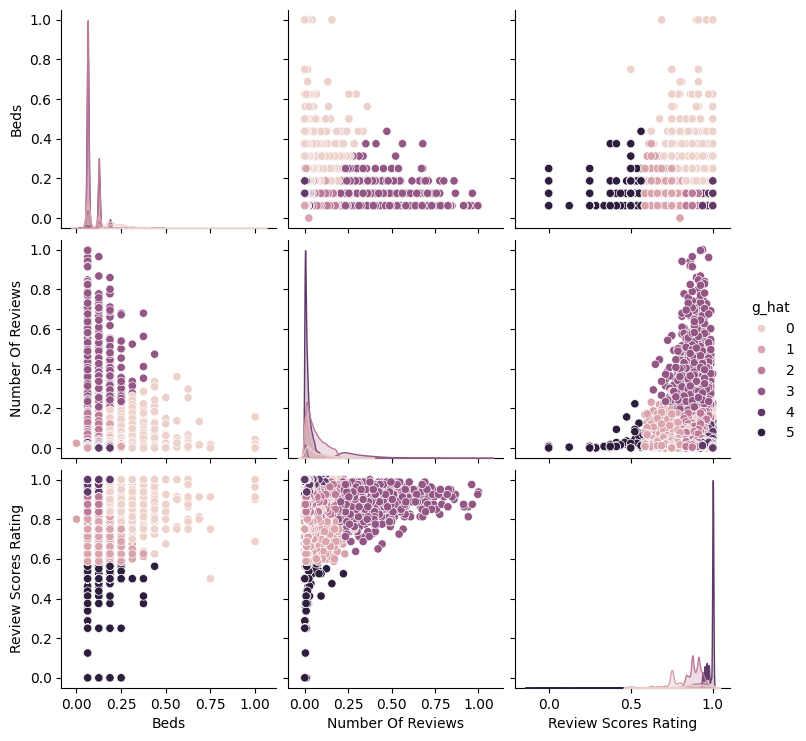

In [7]:
viz = sns.pairplot(data = gdf, hue = 'g_hat')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [8]:
df['g_hat'] = model.labels_
df.loc[:,['Price','g_hat'] ].groupby('g_hat').describe()

<ipython-input-8-34fb0e57c1b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['g_hat'] = model.labels_


Price                                                          
        count        mean         std   min    25%    50%    75%    max
g_hat                                                                  
0      1730.0  268.871098  166.607420  27.0  150.0  225.0  350.0  997.0
1      2868.0  130.155160   83.672919  20.0   70.0  108.0  165.0  899.0
2      7459.0  136.010055   75.916771  22.0   82.0  120.0  175.0  999.0
3      1791.0  135.628141   78.951432  27.0   85.0  120.0  170.0  875.0
4      7804.0  151.632624   93.891864  10.0   85.0  130.0  195.0  985.0
5       408.0  118.014706   83.327009  25.0   60.0   90.0  150.0  499.0

The first cluster (0) has the highest mean price and its top quadrant is at 350. It has the highest std dev which means that the otherclusters may have the higher price.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

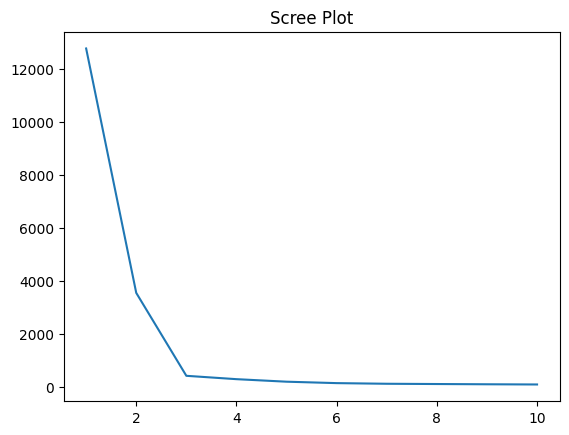

In [32]:
#scree plot
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(gdf) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

k of 3 seems like the elbow

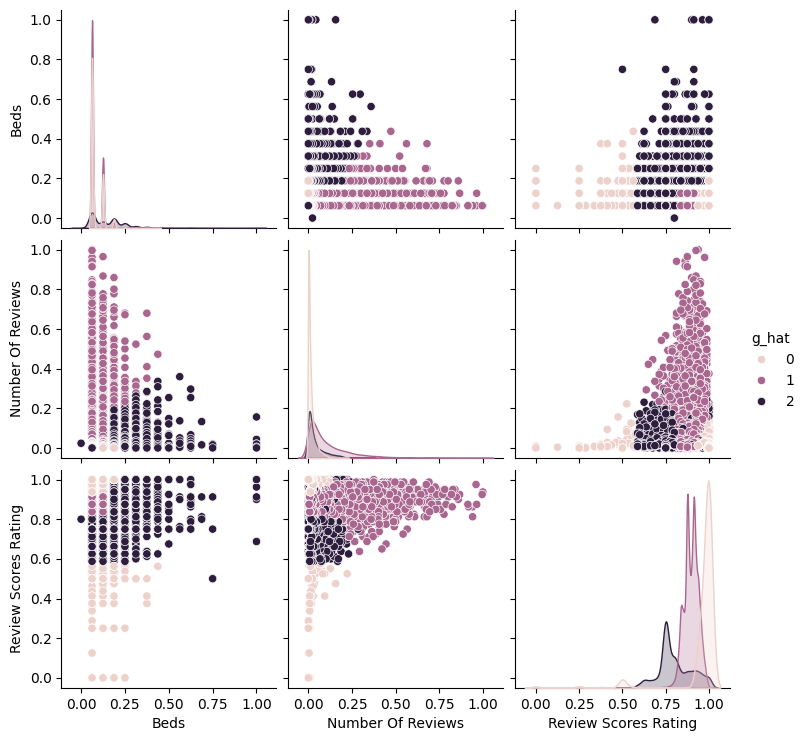

In [10]:
#kmc model with 3 clusters
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(gdf)
gdf['g_hat'] = model.labels_

#pairplot
viz = sns.pairplot(data = gdf, hue = 'g_hat')

In [11]:
df['g_hat'] = model.labels_
df.loc[:,['Price','g_hat'] ].groupby('g_hat').describe()

<ipython-input-11-34fb0e57c1b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['g_hat'] = model.labels_


Price                                                          
        count        mean         std   min   25%    50%     75%    max
g_hat                                                                  
0      8212.0  149.962372   93.675880  10.0  85.0  130.0  194.25  985.0
1      9250.0  135.936108   76.509553  22.0  84.0  120.0  175.00  999.0
2      4598.0  182.347107  139.008782  20.0  88.0  145.0  225.00  997.0

Cluster 3 has the highest mean price, but cluster 2 has the highest max price. Compared to the 6 cluster iteration, these clusters are more evenly distributed and thus more optimized.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [12]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


<Axes: xlabel='x1', ylabel='x2'>

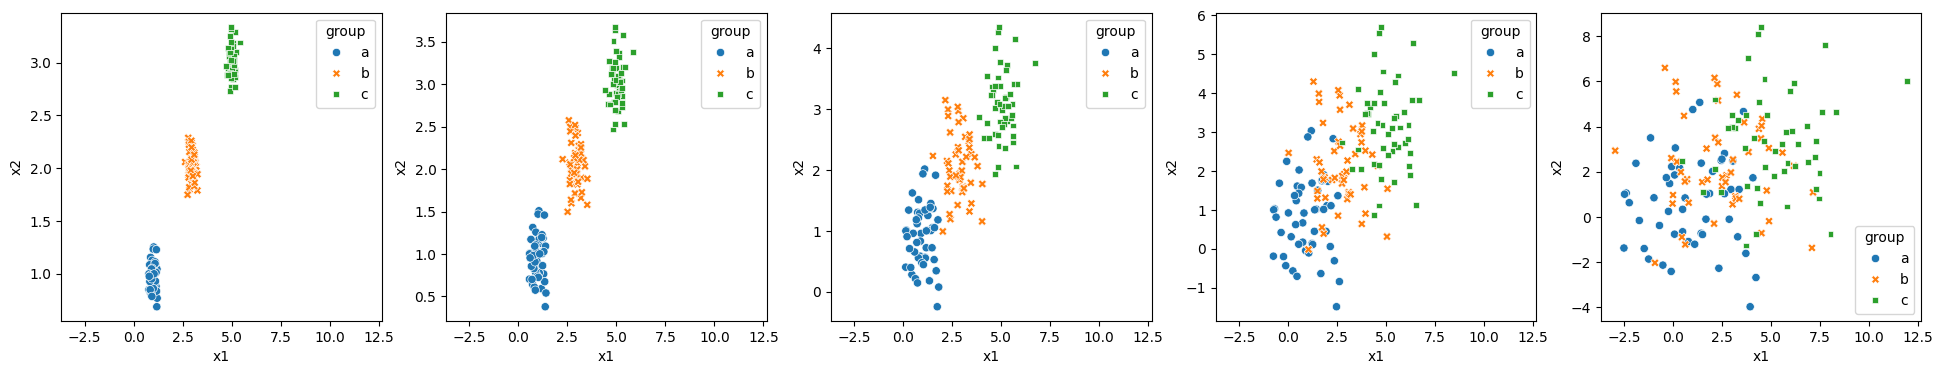

In [21]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(24,4))
sns.scatterplot(ax = axes[0], data = df0_125, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(ax = axes[1], data = df0_25, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(ax = axes[2], data = df0_5, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(ax = axes[3], data = df1_0, x = 'x1',y='x2',hue='group',style='group')
sns.scatterplot(ax = axes[4], data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As the noise goes up the visual distinctness of the clusters goes down and overlap increases.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

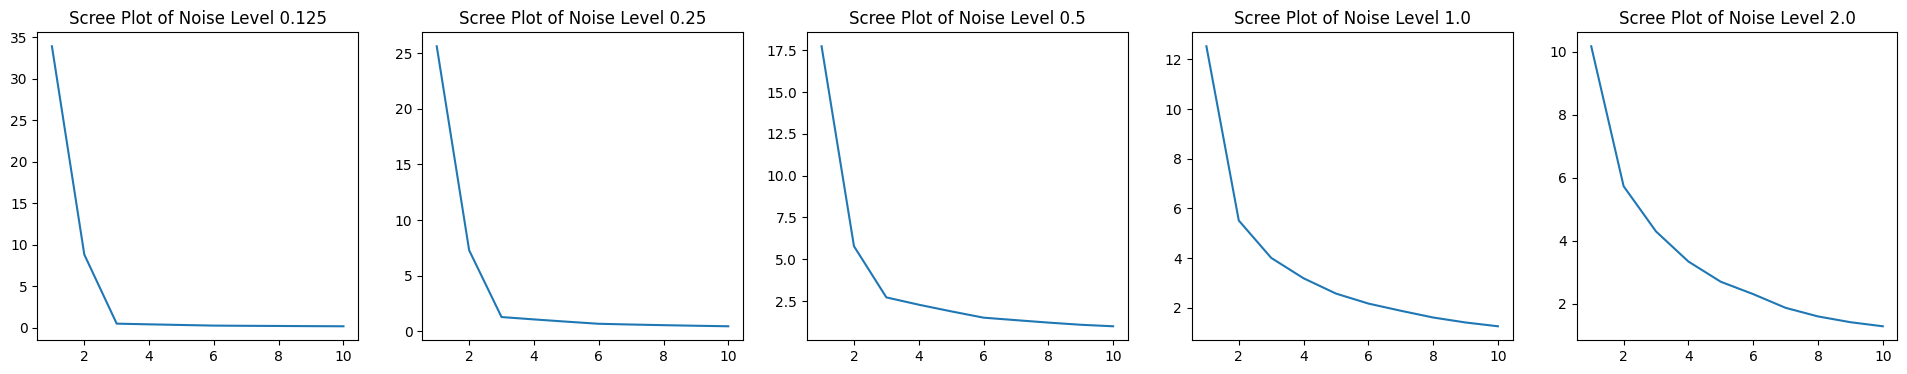

In [42]:
def scree(data, a):
  X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
  X = X.apply(maxmin) # Normalize the data
  k_bar = 10
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the emodel
      SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
  scree_plot = sns.lineplot(ax = axes[a], x=k_grid, y=SSE).set_title('Scree Plot of Noise Level ' + str(0.125*np.power(2,a))) # Create scree plot

fig, axes = plt.subplots(1, 5, sharex=True, figsize=(24,4))
scree(df0_125, 0)
scree(df0_25, 1)
scree(df0_5, 2)
scree(df1_0, 3)
scree(df2_0, 4)

An increase in noise smooths out the scree plot (towards linearity), and makes it harder to identify a cleaer k value.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow is where the k value is optimized and matches the true number of clusters the most. In this case, a high level noise caused the clusters to overlap and become less visibly distinctive. A lower distinctiveness leads to a less sharp and distinctive elbow, meaning there is no k that is significantly better and optimized than the others. From this, it is clear that the presence or absence of an elbow tells you how well a kMC approach will work for a given dataset.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?